# 911 Calls Capstone Project - Solutions

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [3]:
df = pd.read_csv(r"C:\Users\basel\Downloads\archive data\911.csv")

** Check the info() of the df **

In [4]:
import io
buffer = io.StringIO()
df.info(buf=buffer)
info = buffer.getvalue()

print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB



** Check the head of df **

In [5]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)       
pd.set_option('display.max_colwidth', None)  

print("-" * 40)
print(df.head(3))

----------------------------------------
         lat        lng                                                                                 desc      zip                    title            timeStamp                twp                        addr  e
0  40.297876 -75.581294            REINDEER CT & DEAD END;  NEW HANOVER; Station 332; 2015-12-10 @ 17:10:52;  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:10:52        NEW HANOVER      REINDEER CT & DEAD END  1
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP; Station 345; 2015-12-10 @ 17:29:21;  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:29:21  HATFIELD TOWNSHIP  BRIAR PATH & WHITEMARSH LN  1
2  40.121182 -75.351975                           HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-Station:STA27;  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 14:39:21         NORRISTOWN                    HAWS AVE  1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [6]:
zipcodes = df['zip'].value_counts().head(5)
print(zipcodes)

zip
19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: count, dtype: int64


** What are the top 5 townships (twp) for 911 calls? **

In [7]:
towships = df['twp'].value_counts().head(5)
print(towships)

twp
LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: count, dtype: int64


** Take a look at the 'title' column, how many unique title codes are there? **

In [8]:
unique_count = df['title'].nunique()
print(unique_count)

148


## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [9]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
print(df[['title', 'Reason']].head())

                     title Reason
0   EMS: BACK PAINS/INJURY    EMS
1  EMS: DIABETIC EMERGENCY    EMS
2      Fire: GAS-ODOR/LEAK   Fire
3   EMS: CARDIAC EMERGENCY    EMS
4           EMS: DIZZINESS    EMS


** What is the most common Reason for a 911 call based off of this new column? **

In [10]:
common_reason = df['Reason'].value_counts()
print(common_reason)

Reason
EMS        332692
Traffic    230208
Fire       100622
Name: count, dtype: int64


** Now use seaborn to create a countplot of 911 calls by Reason. **

C:\Users\basel\AppData\Local\Temp\ipykernel_36548\606990791.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Reason', data=df, palette='viridis')


Text(0, 0.5, 'Count')

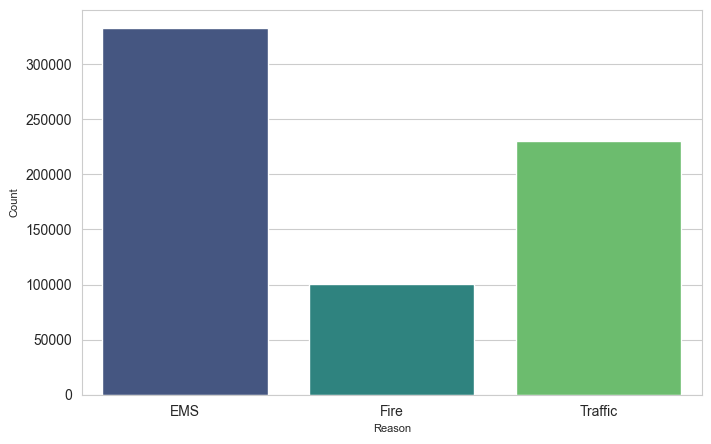

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Reason', data=df, palette='viridis')

plt.xlabel('Reason', fontsize=8)
plt.ylabel('Count', fontsize=8)

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [12]:
time_type = df['timeStamp'].dtype
print("str" if time_type == 'object' else time_type)

str


** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [13]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
print(df['timeStamp'].head())

0   2015-12-10 17:10:52
1   2015-12-10 17:29:21
2   2015-12-10 14:39:21
3   2015-12-10 16:47:36
4   2015-12-10 16:56:52
Name: timeStamp, dtype: datetime64[ns]


** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [14]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

print(df[['timeStamp', 'Hour', 'Month', 'Day of Week']].head())

            timeStamp  Hour  Month  Day of Week
0 2015-12-10 17:10:52    17     12            3
1 2015-12-10 17:29:21    17     12            3
2 2015-12-10 14:39:21    14     12            3
3 2015-12-10 16:47:36    16     12            3
4 2015-12-10 16:56:52    16     12            3


** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [15]:
dmap = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [16]:
df['Day of Week'] = df['Day of Week'].map(dmap)

print(df[['timeStamp', 'Day of Week']].head())

            timeStamp Day of Week
0 2015-12-10 17:10:52         Thu
1 2015-12-10 17:29:21         Thu
2 2015-12-10 14:39:21         Thu
3 2015-12-10 16:47:36         Thu
4 2015-12-10 16:56:52         Thu


** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

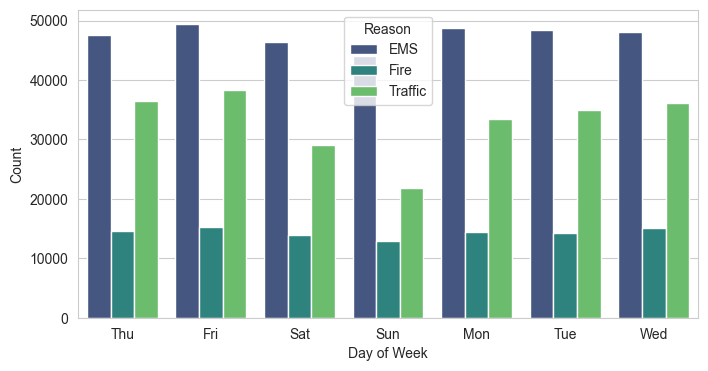

In [17]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Day of Week', data=df, hue='Reason', palette='viridis')

plt.xlabel('Day of Week', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.legend(title='Reason')

** Now do the same for Month:**

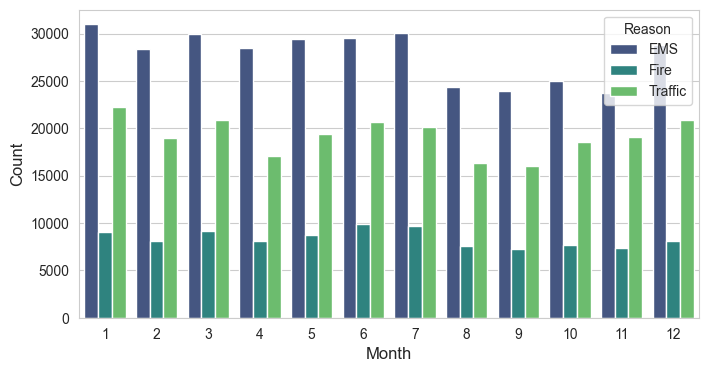

In [18]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Month', data=df, hue='Reason', palette='viridis')

plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Reason')

** Did you notice something strange about the Plot? **

In [19]:
print("Unique Months:", df['Month'].unique())
print("Missing values:", df['Month'].isnull().sum())

Unique Months: [12  1  2  3  4  5  6  7  8  9 10 11]
Missing values: 0


** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...**

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [20]:
byMonth = df.groupby('Month').count()
print(byMonth.head())

         lat    lng   desc    zip  title  timeStamp    twp   addr      e  Reason   Hour  Day of Week
Month                                                                                               
1      62336  62336  62336  55294  62336      62336  62312  62336  62336   62336  62336        62336
2      55427  55427  55427  48922  55427      55427  55405  55427  55427   55427  55427        55427
3      60027  60027  60027  53252  60027      60027  60001  60027  60027   60027  60027        60027
4      53671  53671  53671  47349  53671      53671  53655  53671  53671   53671  53671        53671
5      57509  57509  57509  50354  57509      57509  57474  57509  57509   57509  57509        57509


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

Text(0, 0.5, 'Num of Calls')

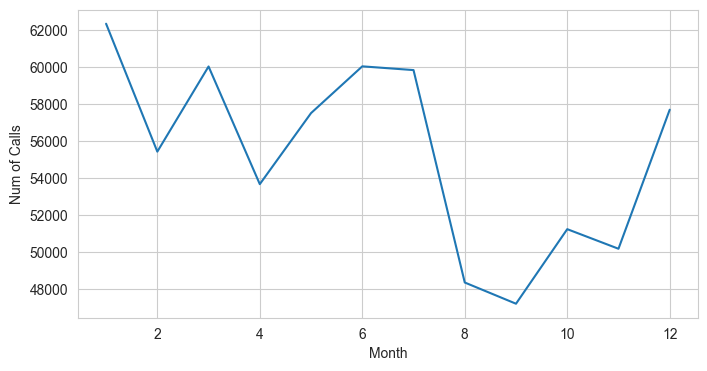

In [21]:
plt.figure(figsize=(8, 4))
byMonth['title'].plot()
plt.xlabel('Month', fontsize=10)
plt.ylabel('Num of Calls', fontsize=10)

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

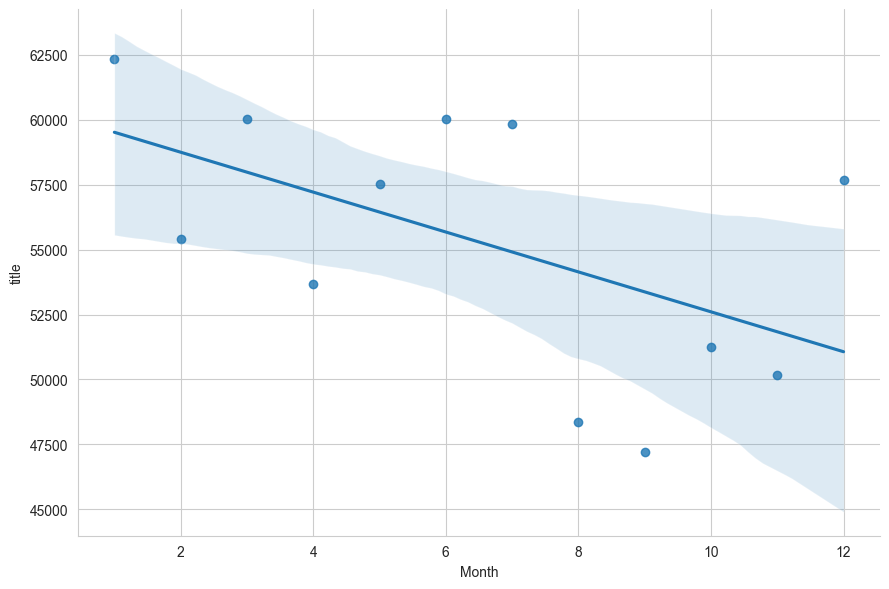

In [22]:
byMonth_reset = byMonth.reset_index()
sns.lmplot(x='Month', y='title', data=byMonth_reset, height=6, aspect=1.5)

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [23]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())
print(df[['timeStamp', 'Date']].head())

            timeStamp        Date
0 2015-12-10 17:10:52  2015-12-10
1 2015-12-10 17:29:21  2015-12-10
2 2015-12-10 14:39:21  2015-12-10
3 2015-12-10 16:47:36  2015-12-10
4 2015-12-10 16:56:52  2015-12-10


** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

Text(0, 0.5, 'Num of Calls')

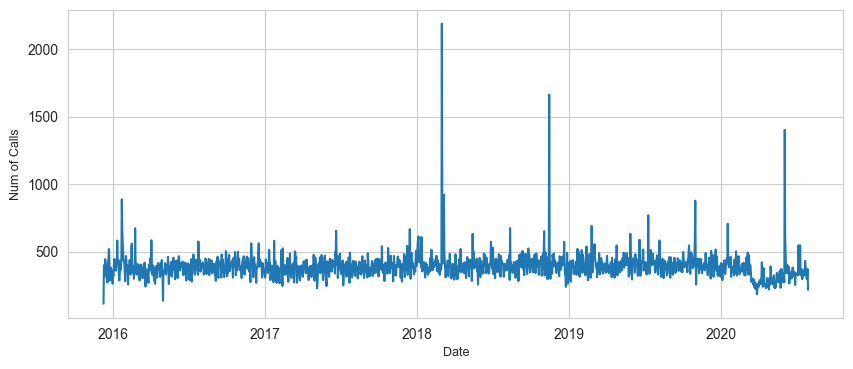

In [24]:
by_date = df.groupby('Date').count()
plt.figure(figsize=(10, 4))
by_date['title'].plot()
plt.xlabel('Date', fontsize=9)
plt.ylabel('Num of Calls', fontsize=9)

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

Text(0, 0.5, 'Number of Calls')

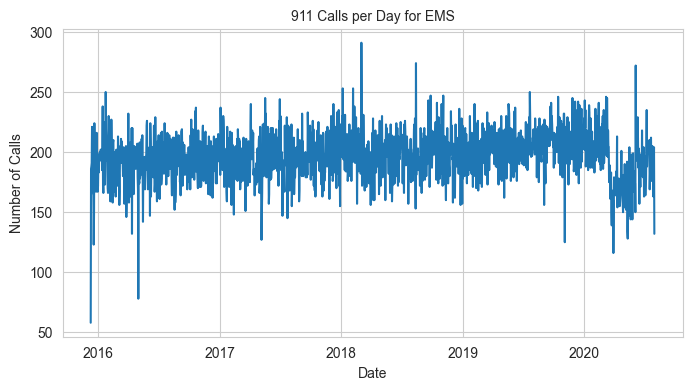

In [25]:
data_ems = df[df['Reason'] == 'EMS'].groupby('Date').count()
plt.figure(figsize=(8, 4))
data_ems['title'].plot()
plt.title('911 Calls per Day for EMS', fontsize=10)
plt.xlabel('Date')
plt.ylabel('Number of Calls')

Text(0, 0.5, 'Number of Calls')

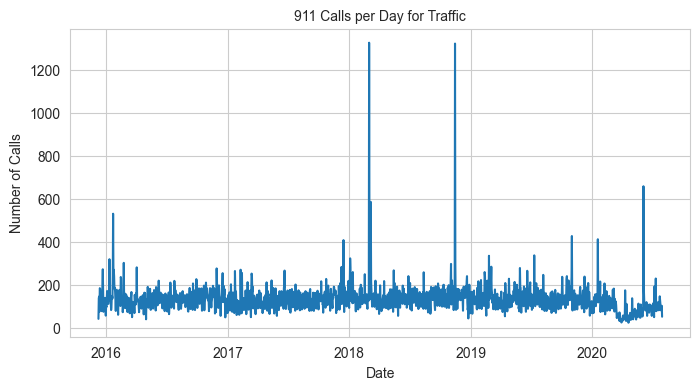

In [26]:
data_traffic = df[df['Reason'] == 'Traffic'].groupby('Date').count()
plt.figure(figsize=(8, 4))
data_traffic['title'].plot()
plt.title('911 Calls per Day for Traffic', fontsize=10)
plt.xlabel('Date')
plt.ylabel('Number of Calls')

Text(0, 0.5, 'Number of Calls')

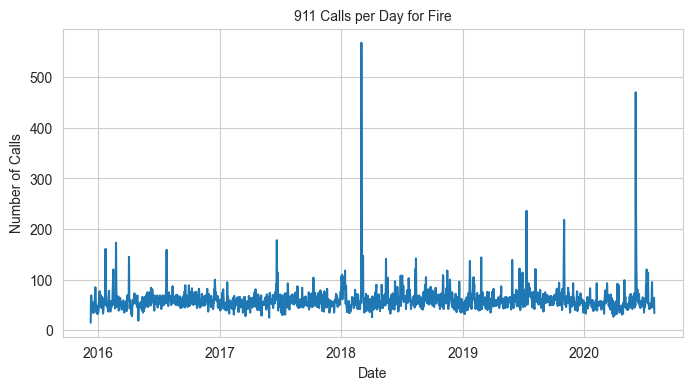

In [27]:
data_fire = df[df['Reason'] == 'Fire'].groupby('Date').count()
plt.figure(figsize=(8, 4))
data_fire['title'].plot()
plt.title('911 Calls per Day for Fire', fontsize=10)
plt.xlabel('Date')
plt.ylabel('Number of Calls')

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [28]:
heatmap = df.groupby(['Day of Week', 'Hour']).count()['title'].unstack()
print(heatmap.head())

Hour           0     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21    22    23
Day of Week                                                                                                                                                
Fri          1983  1635  1449  1296  1339  1639  2670  4143  5018  5288  5584  5843  5994  6181  6394  7040  7065  7113  5668  5056  4375  3913  3422  2834
Mon          1894  1571  1368  1272  1336  1844  2675  4430  5504  5724  5458  5632  5881  5664  5713  6289  6346  6408  5441  4488  3823  3254  2658  2072
Sat          2447  2059  1883  1592  1451  1580  1880  2489  3457  4315  4944  5450  5555  5378  5421  5181  5211  5213  4980  4753  4127  3895  3226  2965
Sun          2424  2135  1946  1614  1471  1488  1726  2408  3001  3728  4262  4438  4882  4654  4744  4475  4560  4505  4402  4135  3748  3161  2629  2323
Thu          1731  1408  1426  1236  1293  1775  2816  4432  529

** Now create a HeatMap using this new DataFrame. **

Text(70.72222222222221, 0.5, 'Day of Week')

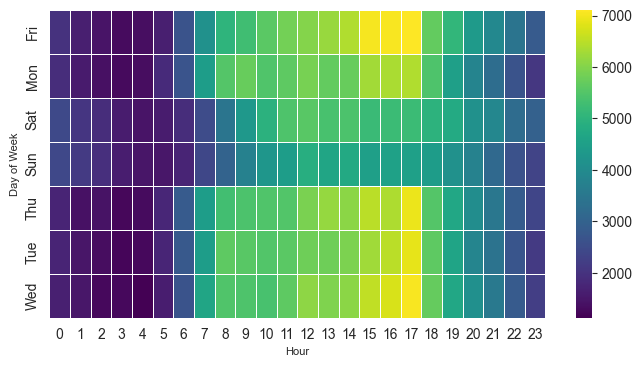

In [43]:
plt.figure(figsize=(8, 4))
sns.heatmap(heatmap, cmap='viridis', linewidths=0.5)

plt.xlabel('Hour', fontsize=8)
plt.ylabel('Day of Week', fontsize=8)

** Now create a clustermap using this DataFrame. **

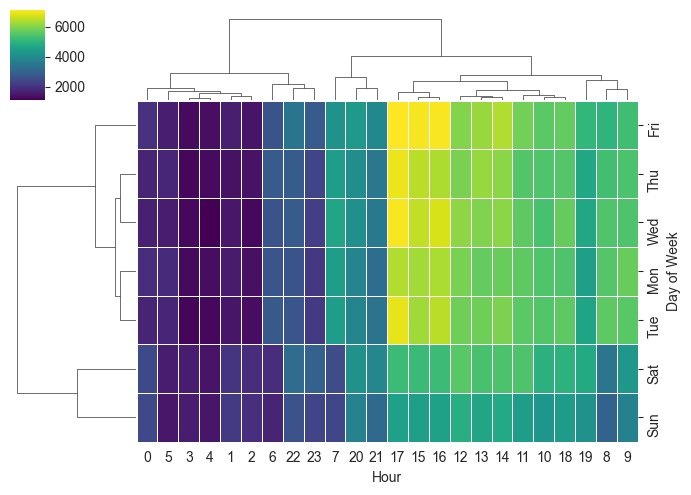

In [32]:
sns.clustermap(heatmap, cmap='viridis', linewidths=0.5, figsize=(7, 5))


** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

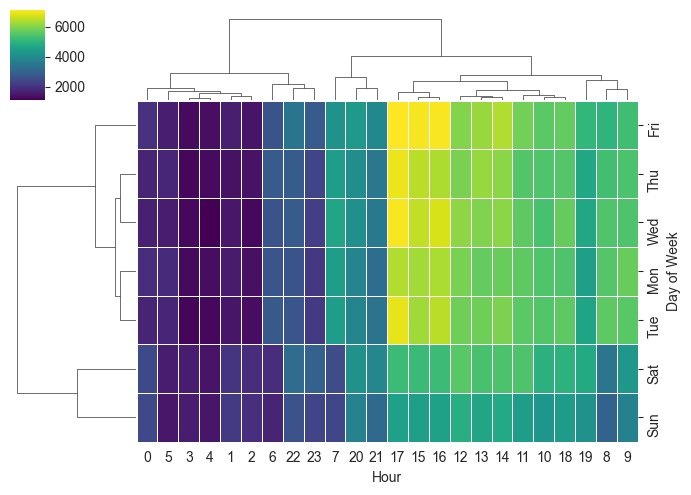

In [34]:
sns.clustermap(heatmap, cmap='viridis', linewidths=0.5, figsize=(7, 5))


Text(70.72222222222221, 0.5, 'Day of Week')

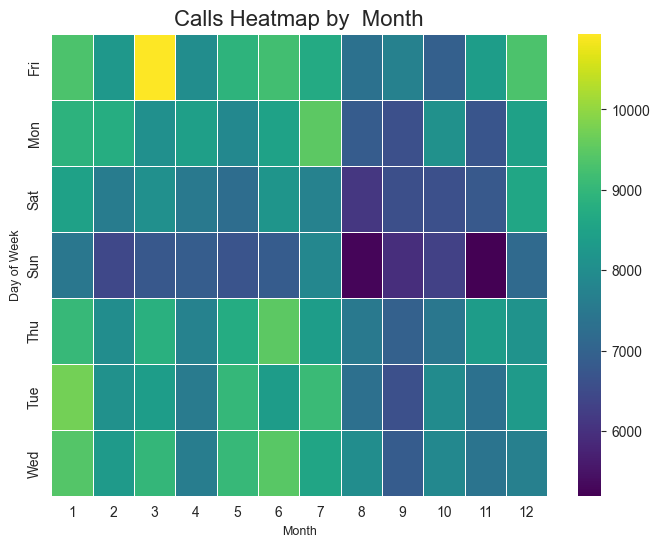

In [42]:
month_data = df.groupby(['Day of Week', 'Month']).count()['title'].unstack()

plt.figure(figsize=(8, 6))
sns.heatmap(month_data, cmap='viridis', linewidths=0.5)
plt.title('Calls Heatmap by  Month', fontsize=16)
plt.xlabel('Month', fontsize=9)
plt.ylabel('Day of Week', fontsize=9)


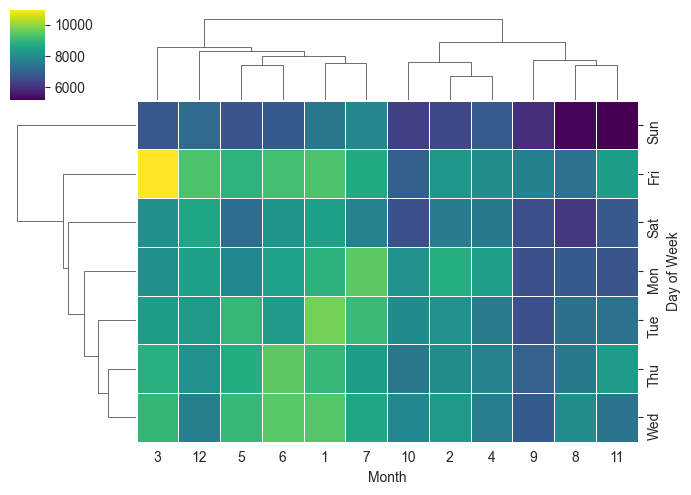

In [37]:
sns.clustermap(month_data, cmap='viridis', linewidths=0.5, figsize=(7,5))


**Continue exploring the Data however you see fit!**
# Great Job!